In [1]:
# Libraries for data preparation & visualization
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# pip install scikit-surprise
# Importing libraries for model building & evaluation
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise import accuracy

In [2]:
# Loading the dataset 
def loaddata(filename):
    df = pd.read_csv(f'{filename}.csv',sep=';',encoding='latin-1')
    return df

book   = loaddata("Books")
user   = loaddata("Users")
rating = loaddata("Ratings")

In [3]:
rating.shape

(1149780, 3)

In [4]:
rating.head(3)

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [5]:
print(f'Duplicate entries: {rating.duplicated().sum()}')

Duplicate entries: 0


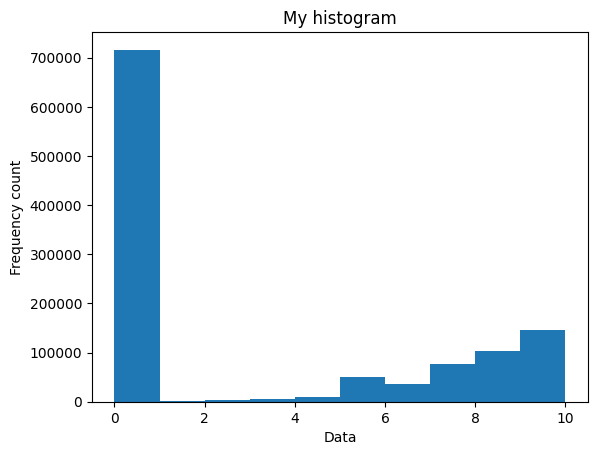

Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt

plt.hist(rating['Rating'])
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('My histogram')
plt.show()

rating_types = rating['Rating'].value_counts()
print(rating_types)

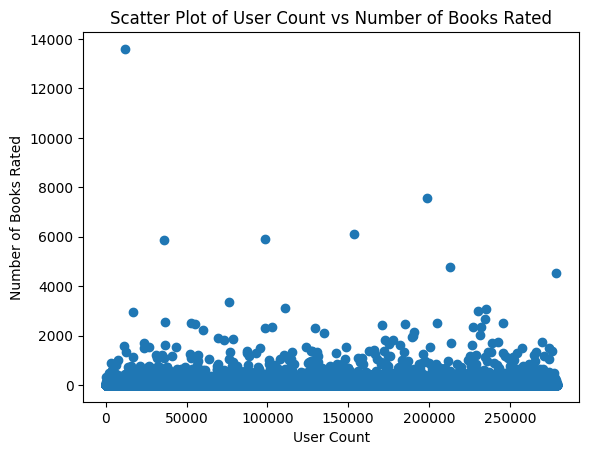

In [7]:
books_rated_by_user = rating.groupby('User-ID')['ISBN'].nunique().reset_index()

# Plotting the scatter graph
plt.scatter(books_rated_by_user['User-ID'], books_rated_by_user['ISBN'])
plt.title('Scatter Plot of User Count vs Number of Books Rated')
plt.xlabel('User Count')
plt.ylabel('Number of Books Rated')
plt.show()

In [8]:
# Calculate the counts for users and books
user_counts = rating['User-ID'].value_counts()
book_counts = rating['ISBN'].value_counts()

# Filter the DataFrame based on the specified conditions
filtered_rating = rating[
    (rating['User-ID'].isin(user_counts[user_counts >= 250].index)) &
    (rating['ISBN'].isin(book_counts[book_counts >= 50].index))
]

# Display the resulting DataFrame
print(filtered_rating)

         User-ID        ISBN  Rating
1456      277427  002542730X      10
1468      277427  006092988X       0
1469      277427  0060930535       0
1470      277427  0060932139       0
1471      277427  0060934417       0
...          ...         ...     ...
1147440   275970  1400031354       0
1147441   275970  1400031362       0
1147470   275970  1558744606       0
1147517   275970  1573229725       0
1147584   275970  1853260010       0

[81431 rows x 3 columns]


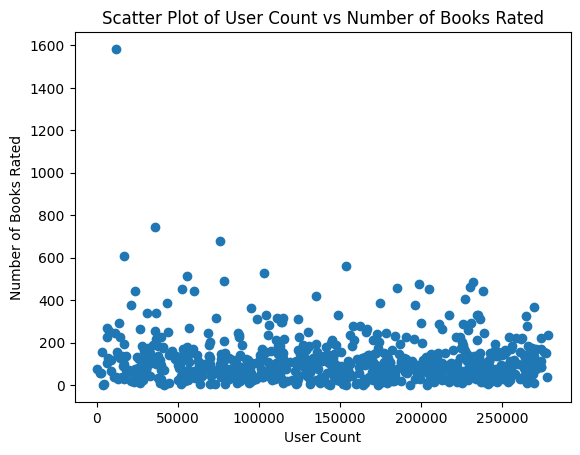

In [9]:
books_rated_by_user = filtered_rating.groupby('User-ID')['ISBN'].nunique().reset_index()

# Plotting the scatter graph
plt.scatter(books_rated_by_user['User-ID'], books_rated_by_user['ISBN'])
plt.title('Scatter Plot of User Count vs Number of Books Rated')
plt.xlabel('User Count')
plt.ylabel('Number of Books Rated')
plt.show()

In [10]:
filtered_rating_merged = filtered_rating.merge(book, on="ISBN")[['User-ID','Title','Rating']] # merging with the book dataframe
filtered_rating_merged

,User-ID,Title,Rating
0,277427,Politically Correct Bedtime Stories: Modern Ta...,10
1,3363,Politically Correct Bedtime Stories: Modern Ta...,0
2,11676,Politically Correct Bedtime Stories: Modern Ta...,6
3,12538,Politically Correct Bedtime Stories: Modern Ta...,10
4,13552,Politically Correct Bedtime Stories: Modern Ta...,0
...,...,...,...
80889,234828,Ringworld,8
80890,236283,Ringworld,0
80891,249628,Ringworld,0
80892,261829,Ringworld,0


In [11]:
print(f'Duplicate entries: {filtered_rating_merged.duplicated().sum()}')

Duplicate entries: 545


In [12]:
filtered_rating_merged.drop_duplicates(inplace=True)
filtered_rating_merged

,User-ID,Title,Rating
0,277427,Politically Correct Bedtime Stories: Modern Ta...,10
1,3363,Politically Correct Bedtime Stories: Modern Ta...,0
2,11676,Politically Correct Bedtime Stories: Modern Ta...,6
3,12538,Politically Correct Bedtime Stories: Modern Ta...,10
4,13552,Politically Correct Bedtime Stories: Modern Ta...,0
...,...,...,...
80889,234828,Ringworld,8
80890,236283,Ringworld,0
80891,249628,Ringworld,0
80892,261829,Ringworld,0


In [13]:
list_of_distinct_users = list(filtered_rating_merged['User-ID'].unique())
list_of_distinct_users

[277427,
 3363,
 11676,
 12538,
 13552,
 16795,
 24194,
 25981,
 26535,
 28204,
 30533,
 31826,
 43246,
 44728,
 51883,
 52584,
 55548,
 60244,
 71712,
 77809,
 80538,
 82831,
 86243,
 88733,
 110934,
 111947,
 112026,
 113270,
 119575,
 128696,
 128835,
 130474,
 131837,
 150979,
 155147,
 165308,
 170518,
 172030,
 173291,
 173415,
 174216,
 174304,
 178667,
 179733,
 183995,
 184299,
 185233,
 188010,
 196077,
 198711,
 200226,
 201526,
 204864,
 208671,
 209516,
 211426,
 225763,
 228998,
 230249,
 234597,
 235842,
 238120,
 243077,
 250405,
 250962,
 264317,
 265313,
 266226,
 266865,
 269566,
 271705,
 11601,
 55187,
 85526,
 92979,
 98741,
 130571,
 133747,
 143415,
 156150,
 162639,
 165319,
 206567,
 222296,
 224138,
 224349,
 233911,
 251844,
 263163,
 263877,
 264031,
 265889,
 254,
 6251,
 7346,
 13273,
 16634,
 17950,
 19664,
 21014,
 31315,
 35050,
 35859,
 36606,
 36836,
 39646,
 40943,
 43842,
 46398,
 48494,
 51350,
 60277,
 62895,
 63394,
 63938,
 68555,
 69232,
 7005

MODEL SELECTION

Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

In [14]:
reader = Reader(rating_scale=(0, 10))   # The Reader class is part of the Surprise library and is used to specify the rating scale
data   = Dataset.load_from_df(filtered_rating_merged[['User-ID','Title','Rating']], reader) 
#The Dataset class is used to load a dataset into the Surprise library

raw_ratings = data.raw_ratings
import random
random.shuffle(raw_ratings)                 # shuffle dataset

threshold   = int(len(raw_ratings)*0.8)

train_raw_ratings = raw_ratings[:threshold] # 80% of data is trainset
test_raw_ratings  = raw_ratings[threshold:] # 20% of data is testset

data.raw_ratings = train_raw_ratings        # data is now the trainset
trainset         = data.build_full_trainset() 
testset          = data.construct_testset(test_raw_ratings)

In [15]:
# Trying KNN (K-Nearest Neighbors) & SVD (Singluar Value decomposition) algorithms using default model parameters

models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline(),SVD()] 
results = {} #dictionary that will store the results of the cross validation for each model.

for model in models:
    # perform 5 fold cross validation
    # evaluation metrics: mean absolute error & root mean square error
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    
    # storing the average score across the 5 fold cross validation for each model
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result

In [16]:
performance_df = pd.DataFrame.from_dict(results)
print("Model Performance: \n")
performance_df.T.sort_values(by='RMSE')

Model Performance: 



,MAE,RMSE,fit_time,test_time
knns.KNNWithMeans,2.338418,3.280340,0.092386,0.417111
knns.KNNBaseline,2.342494,3.287197,0.075548,0.562109
knns.KNNWithZScore,2.311793,3.304099,0.073515,0.457513
matrix_factorization.SVD,2.388487,3.310151,0.384331,0.052390
knns.KNNBasic,2.430221,3.497764,0.049988,0.383527


KNNWithMeans has the least RMSE (root mean square error) among KNN algorithms

The model fit_time is the maximum for SVD but the model test_time is the least

Building Reccomedations

In [17]:
# Entire dataset will be used for building recommendations 

reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(filtered_rating_merged[['User-ID','Title','Rating']], reader)
trainset = data.build_full_trainset()

In [18]:
def generate_recommendationsSVD(userID=13552, get_recommend =10):
    
    ''' This function generates "get_recommend" number of book recommendations 
        using Singular value decomposition. The function needs as input two 
        different parameters:
        (1) userID i.e., userID for which recommendations need to be generated 
        (2) get_recommend i.e., number of recommendations to generate for the userID
        Default values are: userID=13552, get_recommend=10
    '''
    
    model = SVD(n_factors=50, n_epochs=10, lr_all=0.005, reg_all= 0.2)
    model.fit(trainset)
    
    # predict rating for all pairs of users & items that are not in the trainset
    
    testset = trainset.build_anti_testset()
    predictions = model.test(testset)
    predictions_df = pd.DataFrame(predictions)
    
    # get the top get_recommend predictions for userID
    
    predictions_userID = predictions_df[predictions_df['uid'] == userID].\
                         sort_values(by="est", ascending = False).head(get_recommend)
    
    recommendations = []
    recommendations.append(list(predictions_userID['iid']))
    recommendations = recommendations[0]
    
    return(recommendations)

In [19]:
recommendationsSVD = generate_recommendationsSVD(userID=13552, get_recommend =10)
recommendationsSVD

["Sabine's Notebook: In Which the Extraordinary Correspondence of Griffin & Sabine Continues",
 'The Mark: The Beast Rules the World (Left Behind #8)',
 'The Book of Questions',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'The Lord of the Rings (Movie Art Cover)',
 '84 Charing Cross Road',
 'Little House in the Big Woods',
 'Griffin & Sabine: An Extraordinary Correspondence',
 'Little House on the Prairie',
 'The Blue Day Book']

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity ma